**IMPORT LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from IPython.display import Image
import plotly.express as px
import kaleido
import plotly
print("Plotly version:", plotly.__version__)
#print("Kaleido version:", kaleido.__version__)


Plotly version: 6.2.0


**PROBLEM STATEMENT**
- **Understanding the sales in the 2 years.**

-- Total sales overall,monthly,yearly,quartery,weekly,per region,per country,per team,per sales person,per category,per product type.
  
1. What's the total sales?

2. What's the total sales per year?

3. How does the quarterly trend in the two years?

4. What's the monthly trend in the two years?

5. What's the ranking of regions?

6. What's the ranking of countries?

7. What's the ranking of teams?

8. What's the ranking of categories?

9. Which are the top 5 product types?

10. Who are the top 5 best performing sales people?

**LOAD DATA**

In [5]:
df=pd.read_csv("sales project.csv")

In [6]:
# Mask Salesperson
df["Sales Person"] = "Salesperson_" + df["Sales Person"].astype("category").cat.codes.astype(str)

# Mask Team
df["Team"] = "Team_" + df["Team"].astype("category").cat.codes.astype(str)


In [7]:
df.tail(5)

,Sales Person,Team,Country,Region,Product Type,Category,Cost per box,Date,Week,Month,Quarter,Year,Amount,Boxes,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
9444,Salesperson_8,Team_1,Canada,Toronto,Drinking Coco,Other,$9.94,14/03/2022,Wk12,Mar,Q1,2022,"$3,325.00",167,NaN,NaN,NaN,NaN,NaN
9445,Salesperson_22,Team_2,Australia,Sydney,70% Dark Bites,Bites,$5.04,09/03/2022,Wk11,Mar,Q1,2022,"$4,900.00",205,NaN,NaN,NaN,NaN,NaN
9446,Salesperson_6,Team_0,USA,Americas,85% Dark Bars,Bars,$10.51,04/03/2022,Wk10,Mar,Q1,2022,"$8,911.00",388,NaN,NaN,NaN,NaN,NaN
9447,Salesperson_22,Team_2,UK,Europe,70% Dark Bites,Bites,$5.04,24/03/2022,Wk13,Mar,Q1,2022,"$1,316.00",51,NaN,NaN,NaN,NaN,NaN
9448,Salesperson_14,Team_0,Canada,Toronto,Fruit & Nut Bars,Bars,$4.74,01/03/2022,Wk10,Mar,Q1,2022,"$4,340.00",155,NaN,NaN,NaN,NaN,NaN


**DROP COLUMNS WITH NaN**

In [9]:
df.drop(columns=["Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18"],inplace=True)


**CONVERT AMOUNT TO SALES AMOUNT THEN DROP AMOUNT COLUMN**

In [11]:
df["Sales_Amount"]=df["Amount"]
df.drop(columns="Amount",inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales Person  9449 non-null   object
 1   Team          9449 non-null   object
 2   Country       9449 non-null   object
 3   Region        9449 non-null   object
 4   Product Type  9449 non-null   object
 5   Category      9449 non-null   object
 6   Cost per box  9449 non-null   object
 7   Date          9449 non-null   object
 8   Week          9449 non-null   object
 9   Month         9449 non-null   object
 10  Quarter       9449 non-null   object
 11  Year          9449 non-null   int64 
 12  Boxes         9449 non-null   int64 
 13  Sales_Amount  9449 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


**CONVERT Dtype**

In [14]:
df["Sales_Amount"]=df["Sales_Amount"].str.replace(r'[$,]',"",regex="True").astype(float)
df["Cost_per_box"]=df["Cost per box"].str.replace(r'[$,]',"",regex="True").astype(float)
df.drop(columns=["Cost per box"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales Person  9449 non-null   object 
 1   Team          9449 non-null   object 
 2   Country       9449 non-null   object 
 3   Region        9449 non-null   object 
 4   Product Type  9449 non-null   object 
 5   Category      9449 non-null   object 
 6   Date          9449 non-null   object 
 7   Week          9449 non-null   object 
 8   Month         9449 non-null   object 
 9   Quarter       9449 non-null   object 
 10  Year          9449 non-null   int64  
 11  Boxes         9449 non-null   int64  
 12  Sales_Amount  9449 non-null   float64
 13  Cost_per_box  9449 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [15]:
df.head()

,Sales Person,Team,Country,Region,Product Type,Category,Date,Week,Month,Quarter,Year,Boxes,Sales_Amount,Cost_per_box
0,Salesperson_7,Team_3,UK,Europe,Almond Choco,Bars,01/01/2021,Wk1,Jan,Q1,2021,422,2037.0,5.15
1,Salesperson_16,Team_1,India,APAC,Almond Choco,Bars,01/01/2021,Wk1,Jan,Q1,2021,126,6160.0,5.15
2,Salesperson_9,Team_3,Canada,Toronto,Caramel Stuffed Bars,Bars,01/01/2021,Wk1,Jan,Q1,2021,200,1442.0,8.43
3,Salesperson_17,Team_1,India,APAC,Eclairs,Bites,01/01/2021,Wk1,Jan,Q1,2021,252,6979.0,6.31
4,Salesperson_20,Team_1,USA,Americas,Manuka Honey Choco,Other,01/01/2021,Wk1,Jan,Q1,2021,71,966.0,6.80


**TOTAL SALES**

- Total sales is 46,086,887

In [17]:
total_sales=df["Sales_Amount"].sum()
print("Total Sales:",total_sales)

Total Sales: 46086887.0


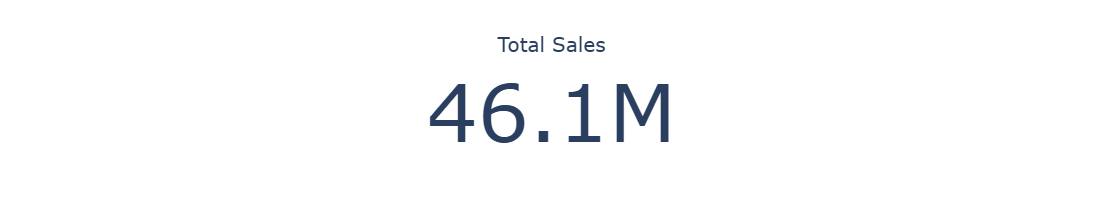

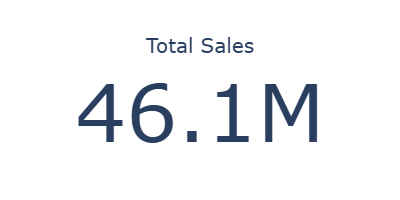

In [18]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_sales,
    title = {"text": "Total Sales"}))
fig.update_layout(
    font=dict(size=18),
    width=500,  #  width size
    height=200,  # height size
    margin=dict(l=20, r=20, t=40, b=20))  # smaller margi

fig.show()
print()

# Save chart as PNG
fig.write_image("total_sales.png",height=200,width=400)
# Display image in notebook (will show on GitHub)
Image("total_sales.png")


**YEARLY SALES**

In [20]:
years=df["Year"].nunique()
print("Years:",years)

actual_years=df["Year"].unique()
print("Actual years:",actual_years)

yearly_sales=df.groupby("Year")["Sales_Amount"].sum()
print("Yearly sales:",yearly_sales)

Years: 2
Actual years: [2021 2022]
Yearly sales: Year
2021    34868092.0
2022    11218795.0
Name: Sales_Amount, dtype: float64


**Bar Chart**

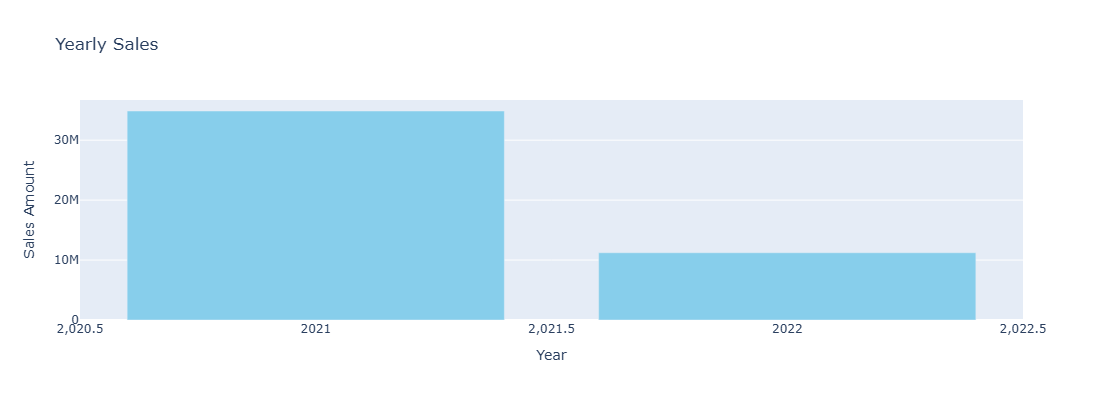

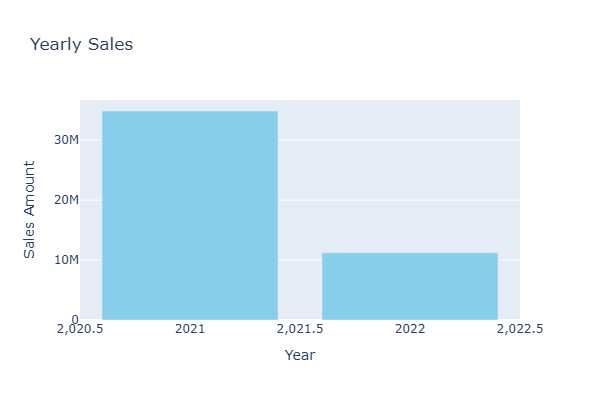

In [140]:


fig = px.bar(
    x=yearly_sales.index,
    y=yearly_sales.values,
    labels={"x": "Year", "y": "Sales Amount"},
    title="Yearly Sales",
    color_discrete_sequence=["skyblue"]
)
fig.update_layout(width=600, height=400)
fig.show()
print() 

fig.write_image("Yearly sales.png",height=400,width=600)
Image("Yearly sales.png")


- In 2021, total sales is $34,868,092

- In 2022, total sales is $11,218,795

- So, there was a drop in sales.Why?


**QUARTERLY SALES**

In [25]:
quarterly_sales=df.groupby(["Quarter","Year"])["Sales_Amount"].sum().reset_index()
print(quarterly_sales)

  Quarter  Year  Sales_Amount
0      Q1  2021     7491281.0
1      Q1  2022    11218795.0
2      Q2  2021     5374404.0
3      Q3  2021     8351259.0
4      Q4  2021    13651148.0


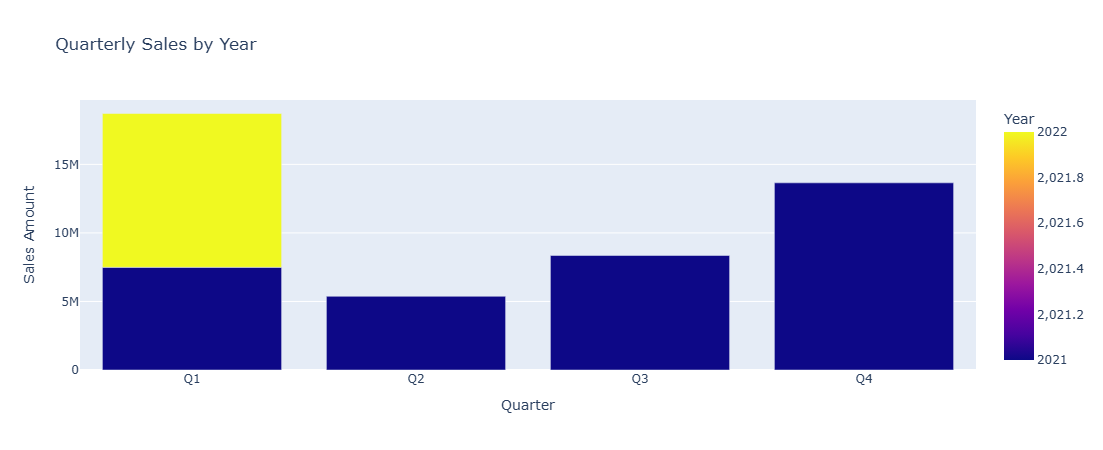

In [26]:
import plotly.express as px

fig = px.bar(
    quarterly_sales,
    x="Quarter",
    y="Sales_Amount",
    color="Year",
    barmode="group",
    title="Quarterly Sales by Year"
)
fig.update_layout(
    width=600, 
    height=450,
    yaxis_title="Sales Amount"
)
fig.show()


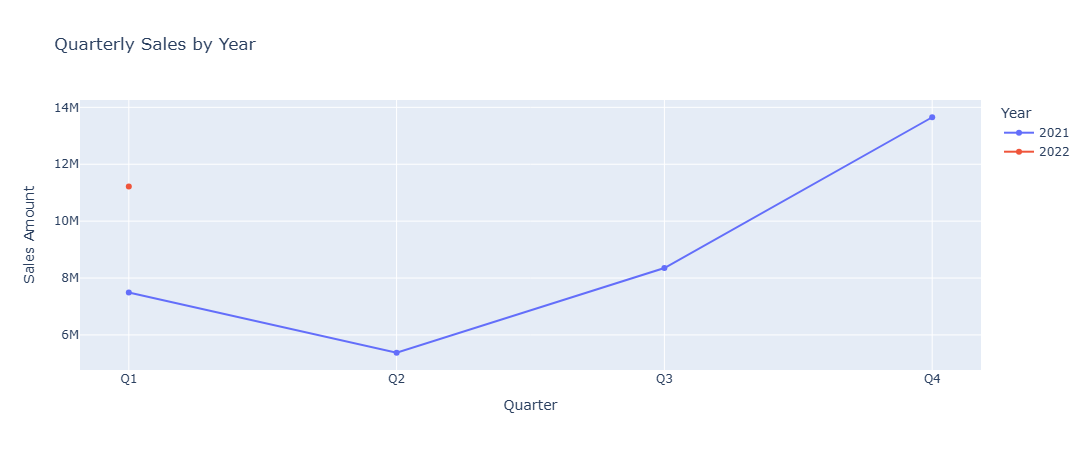

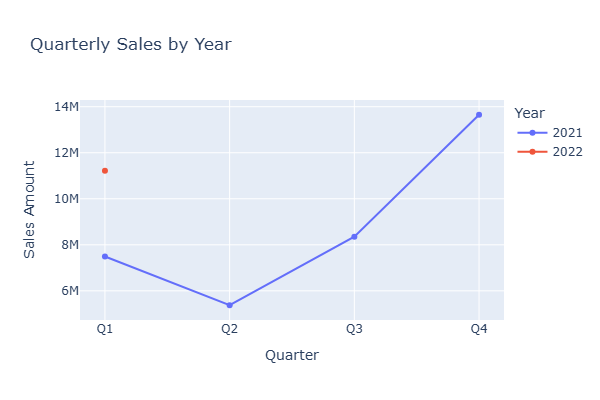

In [27]:
fig = px.line(
    quarterly_sales,
    x="Quarter",
    y="Sales_Amount",
    markers=True,
    color="Year",
    title="Quarterly Sales by Year"
)
fig.update_layout(
    width=600,
    height=450,
    yaxis_title="Sales Amount"
)
fig.show()
print()
fig.write_image("Quarterly Sales by Year.png",height=400,width=600)
Image("Quarterly Sales by Year.png")



- In 2021, the dataset has a full year (4 quarters) but in 2022, the dataset contains only the first quarter. So this explains why in 2022 sales were less than in 2021.

- In 2021, Q1 had 7,491,281, in Q2 they reduced to 5,374,404, in Q3 they raised to 8,351,259, in Q4 they raised to  13,651,148.  Why did they drop in Q2 and why the increase in the 2 consecutive quarters(Q3 and Q4)?

- In 2022,the first quarter, the sales dropped to 11,218,795. Why the drop?

**MONTHLY SALES**




In [30]:
monthly_sales=df.groupby(["Year","Month"])["Sales_Amount"].sum()
monthly_sales = monthly_sales.reset_index()
print(monthly_sales)
#monthly_sales.plot()

    Year Month  Sales_Amount
0   2021   Apr     2736545.0
1   2021   Aug     3144253.0
2   2021   Dec     4526641.0
3   2021   Feb     2586024.0
4   2021   Jan     1752583.0
5   2021   Jul     2682596.0
6   2021   Jun     1337840.0
7   2021   Mar     3152674.0
8   2021   May     1300019.0
9   2021   Nov     4977665.0
10  2021   Oct     4146842.0
11  2021   Sep     2524410.0
12  2022   Feb     4218242.0
13  2022   Jan     4805437.0
14  2022   Mar     2195116.0


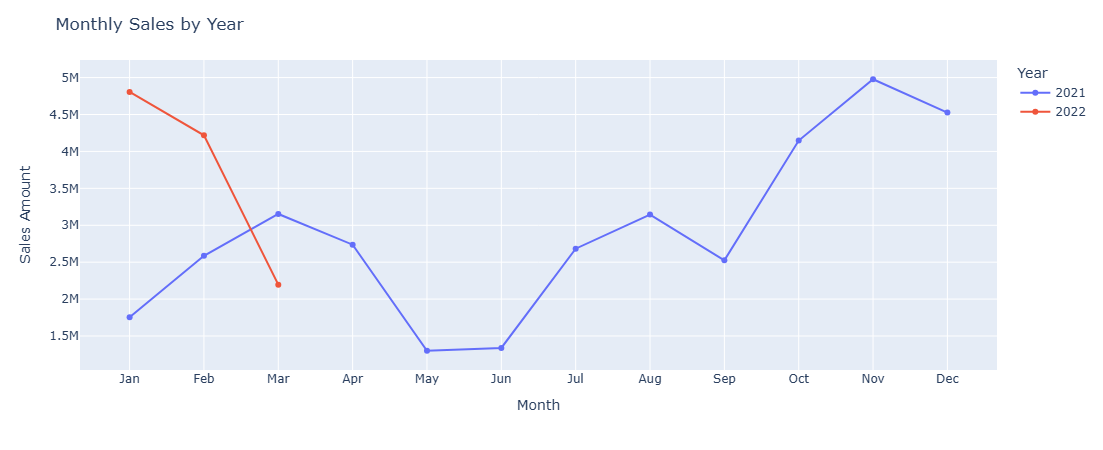

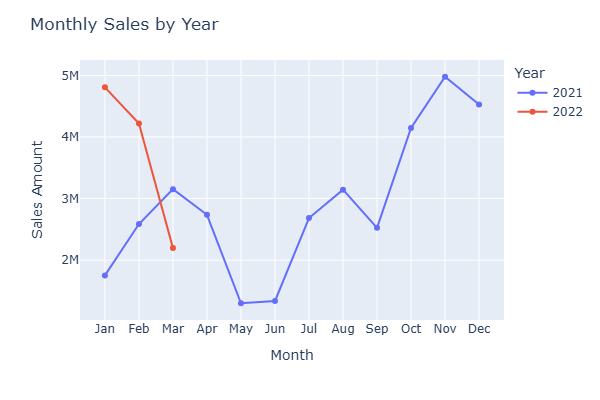

In [31]:
# Define the correct order of months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

#Set 'Month' as a categorical column with the correct order
monthly_sales["Month"] = pd.Categorical(monthly_sales["Month"], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(["Year", "Month"])
fig=px.line(
    monthly_sales,
    x="Month",
    y="Sales_Amount",
    markers=True,
    color="Year"
    
)

fig.update_layout(
    width=600,
    height=450,
    title="Monthly Sales by Year",
    xaxis_title="Month",
    yaxis_title="Sales Amount"
)

fig.show()
print()
fig.write_image("Monthly Sales by Year.png",height=400,width=600)
Image("Monthly Sales by Year.png")

- There is high sales from October 2021 to February 2022.

- The sales seems to drop from March 2021 to May 2021. Slowly rises from June 2021 to August 2021 but drops slightly in September before rising in october to January the following year.

- In 2022, sales are dropping from Jan to March.


**WEEKLY SALES**


In [34]:
weekly_sales=df.groupby(["Year","Week"])["Sales_Amount"].sum().reset_index().head(20).sort_values(["Year","Week"])
weekly_sales

,Year,Week,Sales_Amount
0,2021,Wk1,163415.0
1,2021,Wk10,502887.0
2,2021,Wk11,768663.0
3,2021,Wk12,862771.0
4,2021,Wk13,618093.0
5,2021,Wk14,631036.0
6,2021,Wk15,605829.0
7,2021,Wk16,679812.0
8,2021,Wk17,600880.0
9,2021,Wk18,619248.0


**SALES PER COUNTRY**



In [36]:
total_countries=df["Country"].nunique()
print("Total countries:",total_countries)

country_names=df["Country"].unique()
print("Countries:",country_names)

sales_country=df.groupby("Country")["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(sales_country)

Total countries: 6
Countries: ['UK' 'India' 'Canada' 'USA' 'New Zealand' 'Australia']
       Country  Sales_Amount
0    Australia     7895097.0
1  New Zealand     7815955.0
2       Canada     7761551.0
3          USA     7618989.0
4        India     7507710.0
5           UK     7487585.0


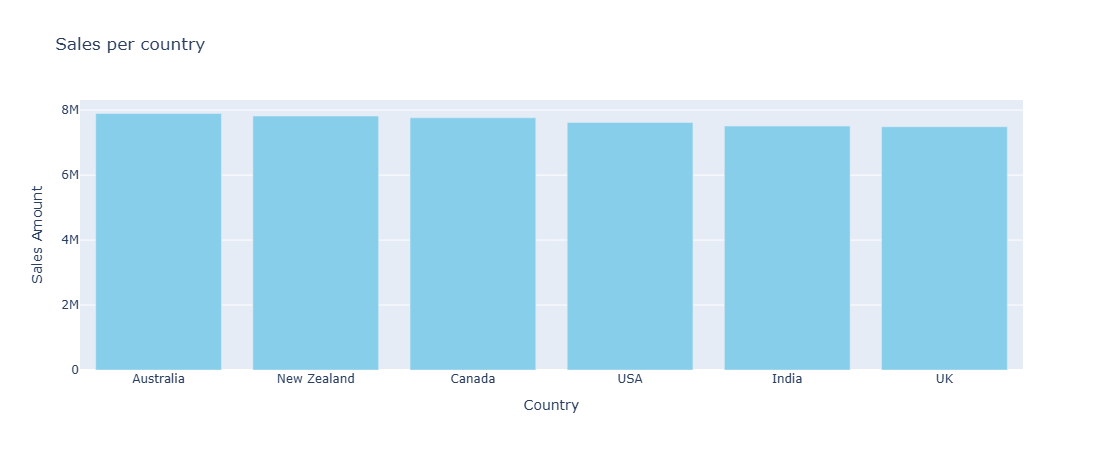

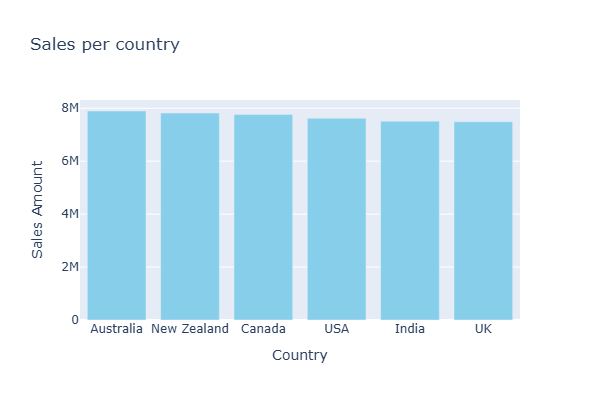

In [37]:
fig = px.bar(
    sales_country,
    x="Country",
    y="Sales_Amount",
    title="Sales per country",
    color_discrete_sequence=["skyblue"]
   
   
)
fig.update_layout(
    width=700, 
    height=450,
    xaxis_title="Country",
    yaxis_title="Sales Amount"
    
    
)
fig.show()
print()
fig.write_image("Sales per country.png",height=400,width=600)
Image("Sales per country.png")

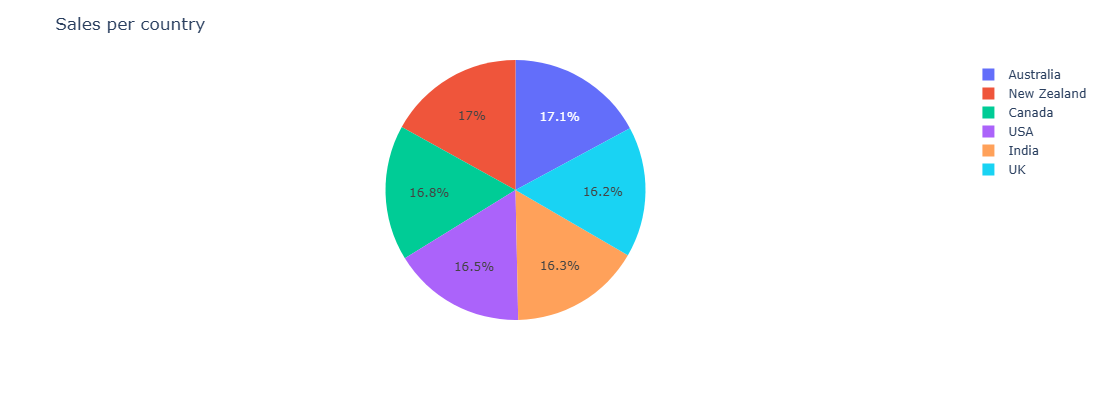

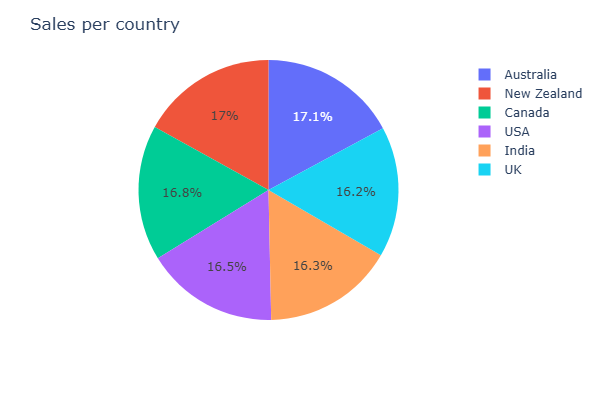

In [38]:
fig=px.pie(
    sales_country,
    names="Country",
    values="Sales_Amount"
    
)
fig.update_layout(
    title="Sales per country",
    width=600,
    height=400
    
)
fig.show()
print()
fig.write_image("Sales per country.png",height=400,width=600)
Image("Sales per country.png")

- Australia is leading with 7,895,097 followed by New Zealand then Canada while UK is the least.

In [40]:
sales_country=df.groupby(["Year","Country"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
sales_country

,Year,Country,Sales_Amount
0,2021,Australia,5935643.0
1,2021,New Zealand,5911283.0
2,2021,USA,5832176.0
3,2021,Canada,5798030.0
4,2021,UK,5790743.0
5,2021,India,5600217.0
6,2022,Canada,1963521.0
7,2022,Australia,1959454.0
8,2022,India,1907493.0
9,2022,New Zealand,1904672.0


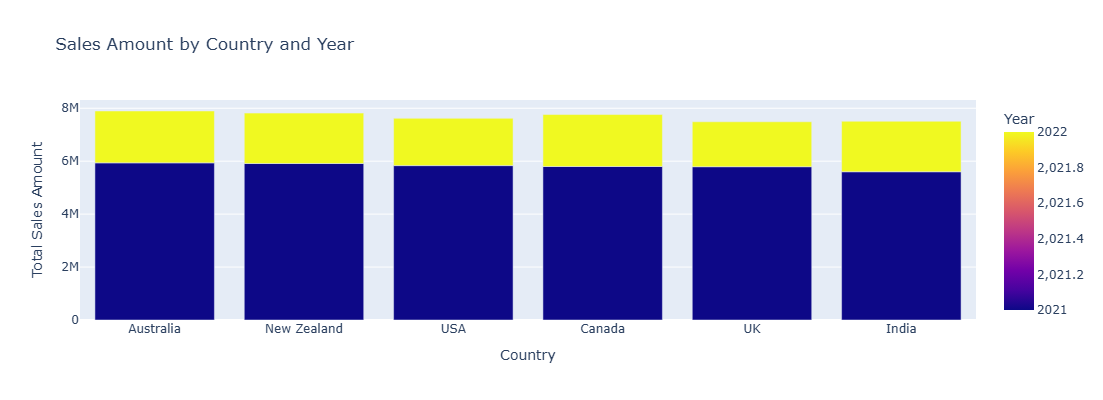

In [41]:
fig = px.bar(sales_country,
             x='Country',
             y='Sales_Amount',
             color='Year',
             barmode='group',
             title='Sales Amount by Country and Year')

fig.update_layout(xaxis_title='Country',
                  yaxis_title='Total Sales Amount',
                  width=600,
                  height=400
                  
                 )
fig.show()


- In 2021, Australia is leading followed by New Zealand but India is the least.

- In 2022,Canada is leading followed by Australia as UK becomes the least.

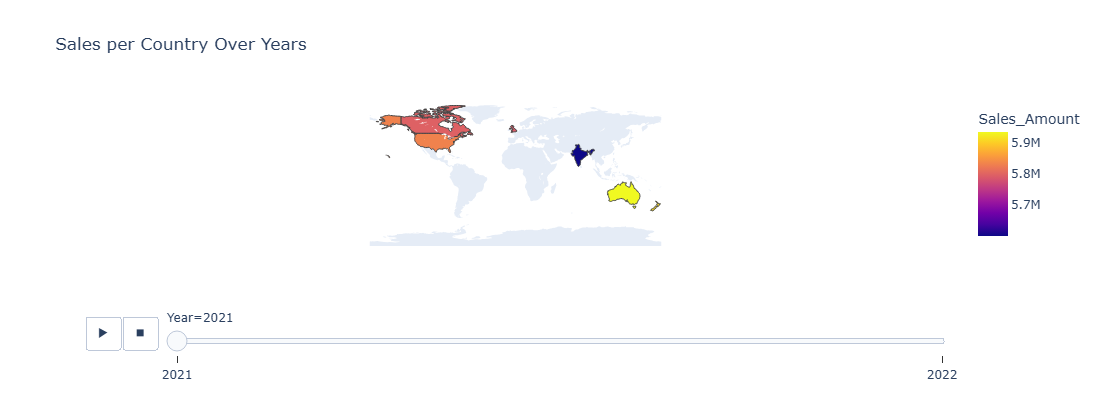

In [43]:
fig = px.choropleth(sales_country,
                    locations='Country',
                    locationmode='country names',
                    color='Sales_Amount',
                    animation_frame='Year',
                    title='Sales per Country Over Years')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False),width=600,height=400)
fig.show()


**SALES PER REGION**

- From my research, Sydney is a city in Australia which is in APAC region, so I'll replace Sydney with APAC.

- Toronto is also a city in Canada which is in Americas, so I'll replace Toronto with Americas.
  



In [45]:
country_region=df.groupby("Country")["Region"].unique()
print()

df["Region"]=df["Region"].replace({'Sydney':'APAC','Toronto':'Americas'})
new_regions=df.groupby("Country")["Region"].unique()
print(new_regions)



Country
Australia          [APAC]
Canada         [Americas]
India              [APAC]
New Zealand        [APAC]
UK               [Europe]
USA            [Americas]
Name: Region, dtype: object


In [46]:
new_regions=df["Region"].nunique()
print("New No. of regions:",new_regions)
print()

new_regions=df["Region"].unique()
print("New list of regions:",new_regions)
print()

country_counts=df.groupby("Region")["Country"].nunique().reset_index()
print(country_counts)
print()

region_sales=df.groupby("Region")["Sales_Amount"].sum().reset_index()
print(region_sales)

New No. of regions: 3

New list of regions: ['Europe' 'APAC' 'Americas']

     Region  Country
0      APAC        3
1  Americas        2
2    Europe        1

     Region  Sales_Amount
0      APAC    23218762.0
1  Americas    15380540.0
2    Europe     7487585.0


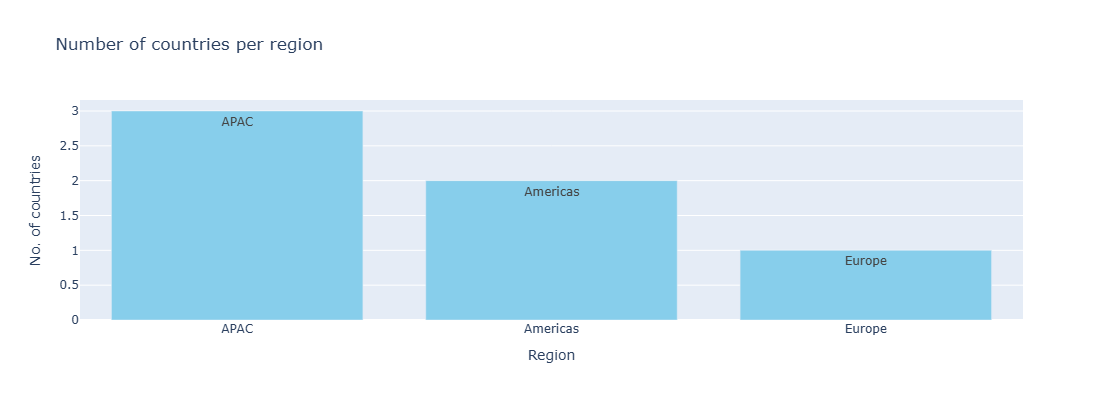

In [47]:
import plotly.express as px

fig = px.bar(country_counts,
             x="Region",
             y="Country",
             title="Number of countries per region",
             text="Region",
             color_discrete_sequence=["skyblue"]
            )

fig.update_layout(yaxis_title="No. of countries",
                  xaxis_title="Region",
                  width=600,
                  height=400
                 )
fig.show()


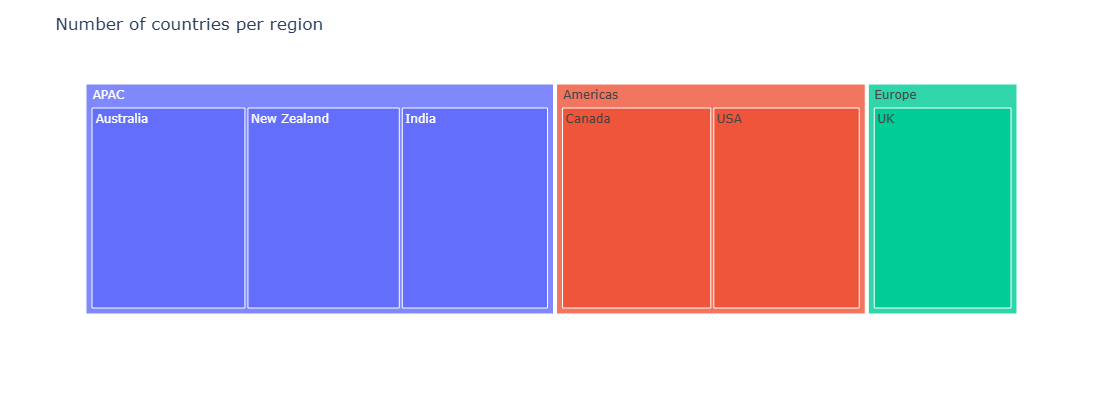

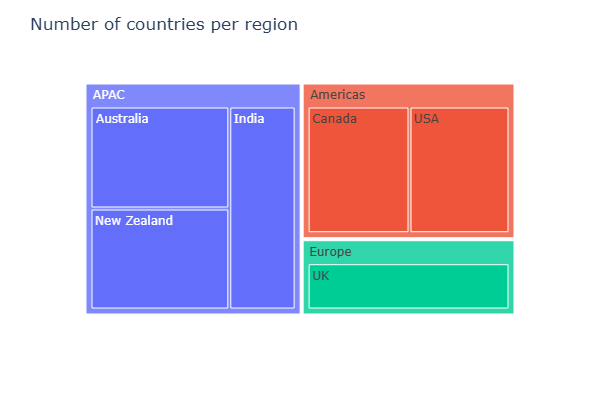

In [48]:
fig = px.treemap(df, path=['Region', 'Country'], values='Sales_Amount')
fig.update_layout(width=600,height=400,title="Number of countries per region")
fig.show()
print()
fig.write_image("Number of countries per region.png",height=400,width=600)
Image("Number of countries per region.png")


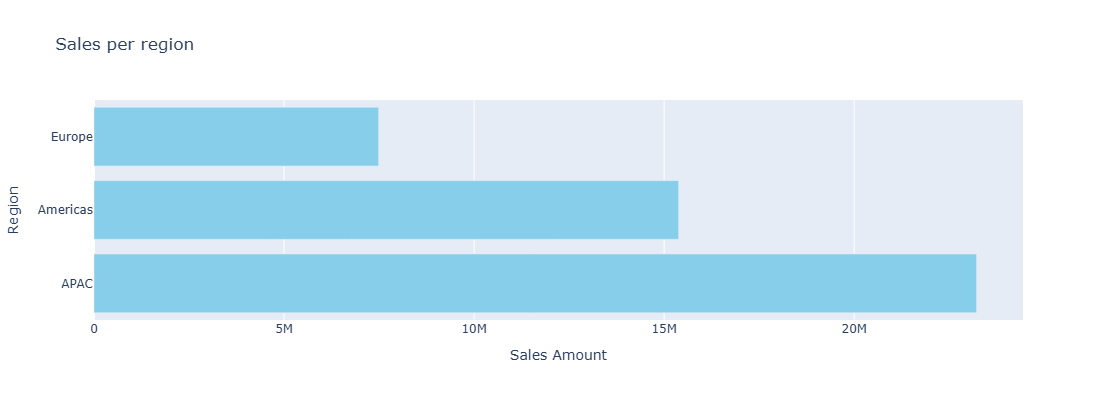

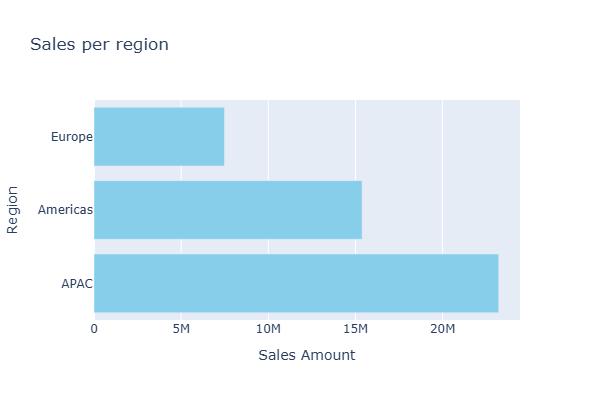

In [49]:
fig = px.bar(
    region_sales,
    x="Sales_Amount",
    y="Region",
    orientation="h",
    title="Sales per region",
    color_discrete_sequence=["skyblue"]
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Sales Amount"
    
)
fig.show()
print()
fig.write_image("Sales per region.png",height=400,width=600)
Image("Sales per region.png")

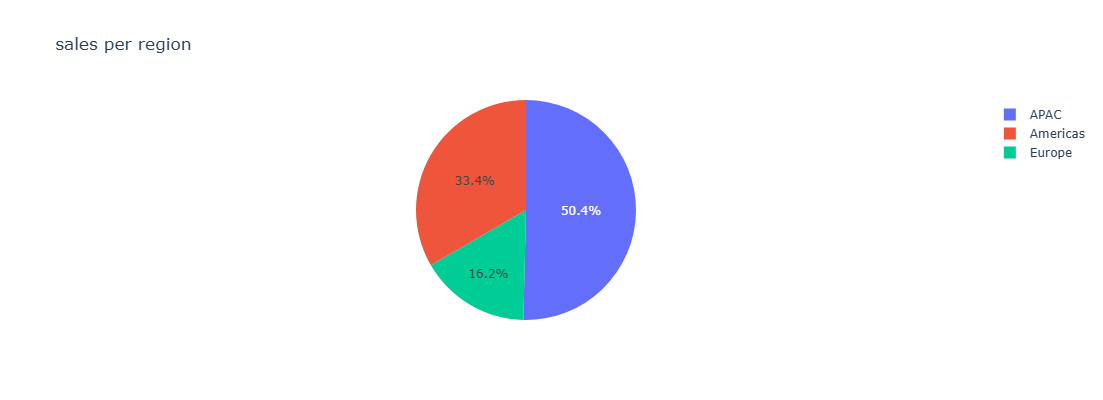

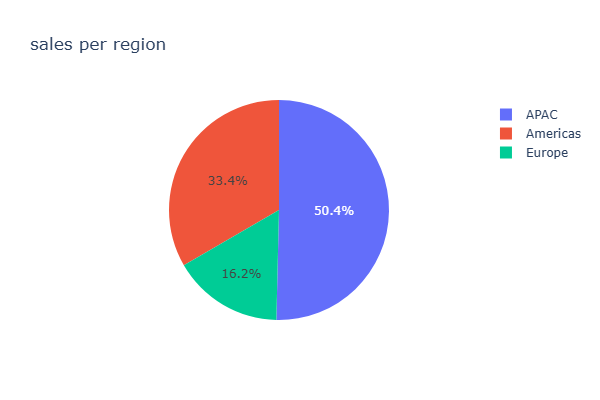

In [50]:
fig = px.pie(
    region_sales,
    names="Region",
    values="Sales_Amount",
    title="sales per region"
)
fig.update_layout(
    width=600,
    height=400
)
fig.show()
print()
fig.write_image("Sales per region.png",height=400,width=600)
Image("Sales per region.png")

- APAC region is leading with 23,218,762. It's countries include Australia ,India and New Zealand.

- Americas is the second one with 15,380,540. It's countries include Canada and USA.

- Europe is the least with 7,487,585. It only has UK.

**SALES PER TEAM**

team_1 has 7 sales people, team_0 has 7,team_3 has 6 and team_2 has 5. This explains the ranking of their performance. But why is team_1 higher than team_0 yet they have same number of sales people?

In 2021, in all the countries this is the order of performance team_1,team_0,team_3 then team_2.

In 2022 there's a difference in trend.

In [144]:
team_no=df["Team"].nunique()
print("Total teams:",team_no)
print()

team_names=df["Team"].unique()
print("Teams:",team_names)
print()

Total teams: 4

Teams: ['Team_3' 'Team_1' 'Team_0' 'Team_2']



In [146]:
team_performance=df.groupby("Team")["Sales_Amount"].sum().sort_values(ascending=False)
print(team_performance)
print()

region_team=df.groupby(["Region","Team"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(region_team)
print()

country_team=df.groupby(["Country","Team"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(country_team)
print()

Team
Team_1    14313152.0
Team_0    13759137.0
Team_3    12259226.0
Team_2     5755372.0
Name: Sales_Amount, dtype: float64

      Region    Team  Sales_Amount
0       APAC  Team_1     7141848.0
1       APAC  Team_0     6995359.0
2       APAC  Team_3     6241417.0
3   Americas  Team_1     4907637.0
4   Americas  Team_0     4630227.0
5   Americas  Team_3     3933426.0
6       APAC  Team_2     2840138.0
7     Europe  Team_1     2263667.0
8     Europe  Team_0     2133551.0
9     Europe  Team_3     2084383.0
10  Americas  Team_2     1909250.0
11    Europe  Team_2     1005984.0

        Country    Team  Sales_Amount
0           USA  Team_1     2507365.0
1     Australia  Team_1     2497194.0
2     Australia  Team_0     2457784.0
3        Canada  Team_1     2400272.0
4         India  Team_1     2373371.0
5           USA  Team_0     2365195.0
6   New Zealand  Team_0     2330867.0
7   New Zealand  Team_1     2271283.0
8        Canada  Team_0     2265032.0
9            UK  Team_1     2263667.0
1

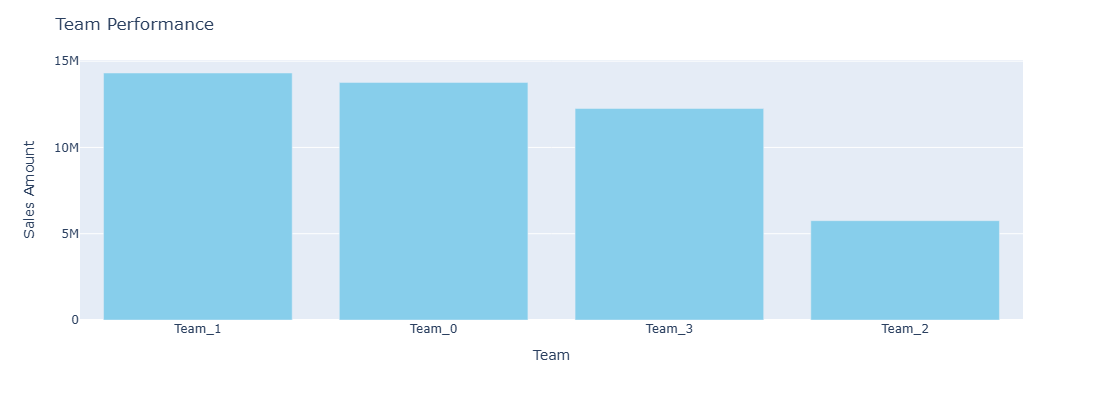

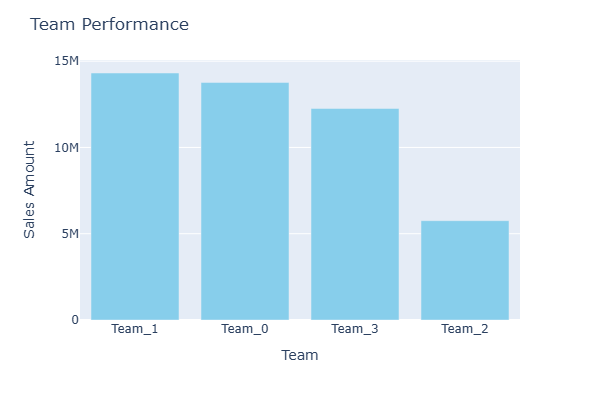

In [149]:
fig=px.bar(
    team_performance,
    x=team_performance.index,
    y=team_performance.values,
    color_discrete_sequence=["skyblue"]
    
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Team",
    yaxis_title="Sales Amount",
    title="Team Performance"
)
fig.show()
print()
fig.write_image("Team Performance.png",height=400,width=600)
Image("Team Performance.png")


- team_1 is the best selling team

In [155]:
team_performance=df.groupby("Team")["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
print(team_performance)
print()

     Team  Sales_Amount
0  Team_1    14313152.0
1  Team_0    13759137.0
2  Team_3    12259226.0
3  Team_2     5755372.0



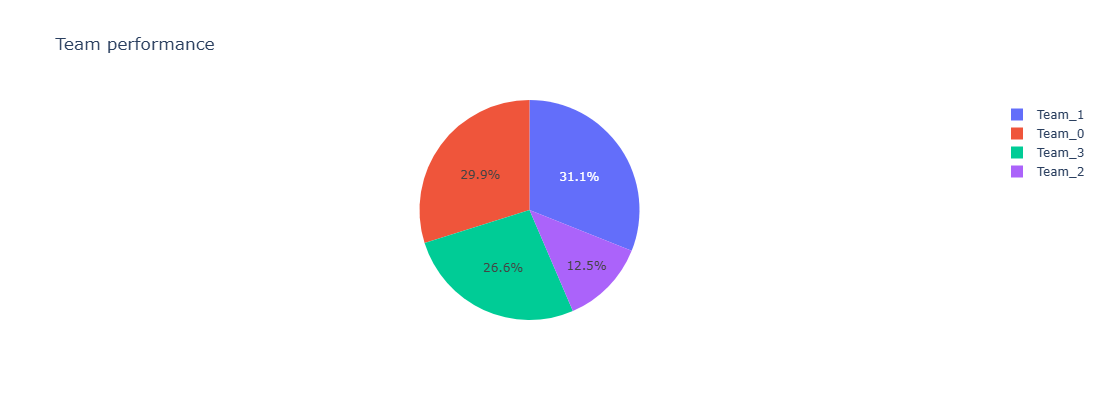

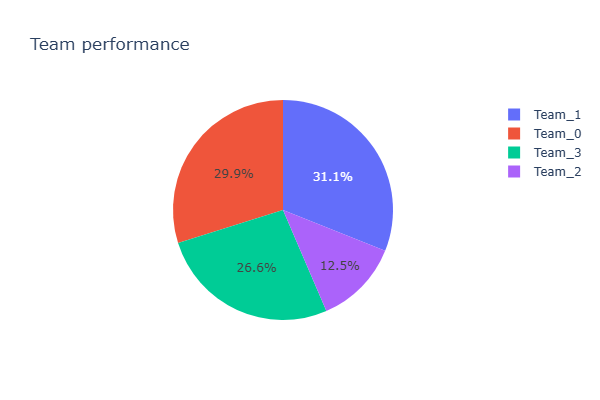

In [157]:
fig=px.pie(
    team_performance,
    names="Team",
    values="Sales_Amount",
    title="Team performance"
)
fig.update_layout(
    width=600,
    height=400
)
fig.show()
print()
fig.write_image("Team Performance.png",height=400,width=600)
Image("Team Performance.png")

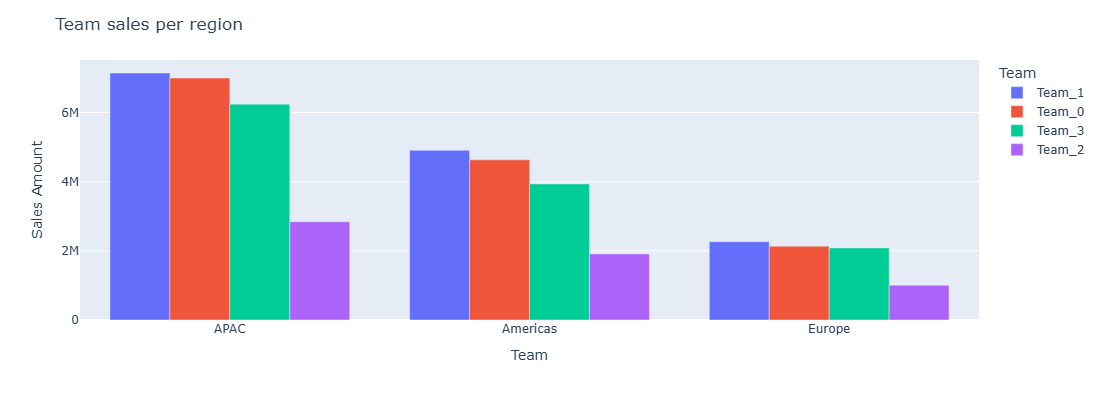

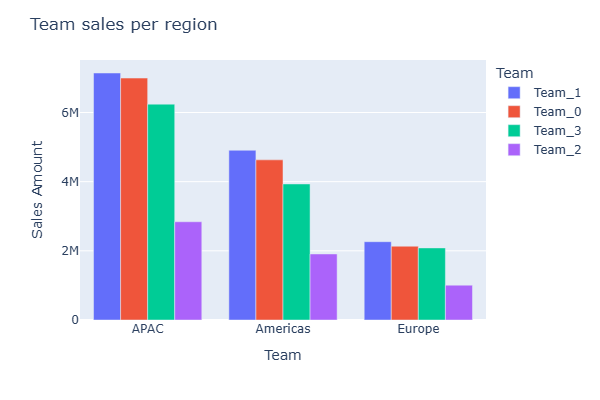

In [163]:
fig=px.bar(
    region_team,
    x="Region",
    y="Sales_Amount",
    color="Team"
    
)
fig.update_layout(
    width=600,
    height=400,
    barmode="group",
    xaxis_title="Team",
    yaxis_title="Sales Amount",
    title="Team sales per region"
)
fig.show()
print()
fig.write_image("Team Performance per region.png",height=400,width=600)
Image("Team Performance per region.png")

- In each region, the teams' ranking is team_1 , team_0, team_3 then team_2 in that order.

In [61]:
year_country_team=df.groupby(["Year","Country","Team"])["Sales_Amount"].sum()
print(year_country_team)
print()

year_month_country_team=df.groupby(["Year","Month","Country","Team"])["Sales_Amount"].sum().reset_index()
print(year_month_country_team)
print()


Year  Country      Team  
2021  Australia    Team_0    1890630.0
                   Team_1    1942724.0
                   Team_2     543438.0
                   Team_3    1558851.0
      Canada       Team_0    1741558.0
                   Team_1    1858808.0
                   Team_2     619171.0
                   Team_3    1578493.0
      India        Team_0    1770671.0
                   Team_1    1876329.0
                   Team_2     564508.0
                   Team_3    1388709.0
      New Zealand  Team_0    1814568.0
                   Team_1    1831739.0
                   Team_2     533561.0
                   Team_3    1731415.0
      UK           Team_0    1828043.0
                   Team_1    1838130.0
                   Team_2     565215.0
                   Team_3    1559355.0
      USA          Team_0    1877673.0
                   Team_1    1903139.0
                   Team_2     524321.0
                   Team_3    1527043.0
2022  Australia    Team_0     567154.0

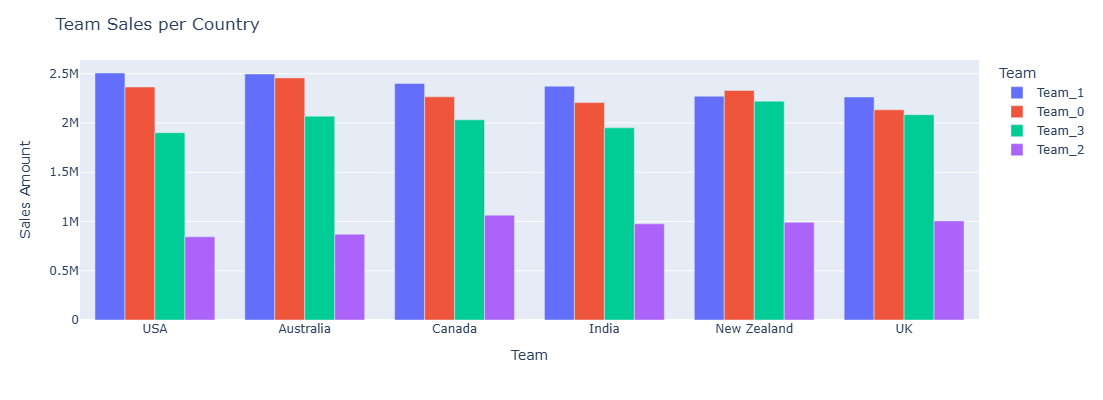

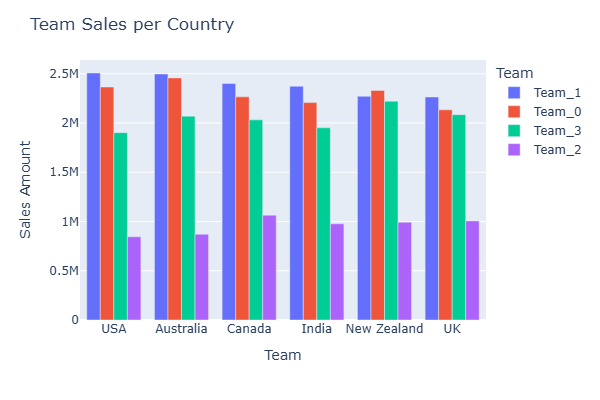

In [161]:
fig=px.bar(
    country_team,
    x="Country",
    y="Sales_Amount",
    color="Team",
    barmode="group"
)
fig.update_layout(
    width=600,
    height=400,
    xaxis_title="Team",
    yaxis_title="Sales Amount",
    title="Team Sales per Country"
)
fig.show()
print()
fig.write_image("Team Performance per country.png",height=400,width=600)
Image("Team Performance per country.png")

- In each country the performance of each team is in this order; team_1, team_0, team_3 then team_2 except New Zealand where team_0 is higher than team_1. Yet to find out why.

**SALES PER SALES PERSON**

There are 25 people in total, each person is a sales person in each region.

In [170]:
no_people=df["Sales Person"].nunique()
print("Total sales people:",no_people)
print()

people_names=df["Sales Person"].unique()
print("Total sales people:",people_names)
print()

top_salespeople=df.groupby("Sales Person")["Sales_Amount"].sum().sort_values(ascending=False).head(5)
print(top_salespeople)
print()

Total sales people: 25

Total sales people: ['Salesperson_7' 'Salesperson_16' 'Salesperson_9' 'Salesperson_17'
 'Salesperson_20' 'Salesperson_3' 'Salesperson_12' 'Salesperson_19'
 'Salesperson_0' 'Salesperson_1' 'Salesperson_11' 'Salesperson_5'
 'Salesperson_8' 'Salesperson_6' 'Salesperson_21' 'Salesperson_14'
 'Salesperson_2' 'Salesperson_15' 'Salesperson_24' 'Salesperson_10'
 'Salesperson_23' 'Salesperson_4' 'Salesperson_18' 'Salesperson_13'
 'Salesperson_22']

Sales Person
Salesperson_10    2195032.0
Salesperson_12    2118543.0
Salesperson_17    2116569.0
Salesperson_2     2109618.0
Salesperson_8     2096857.0
Name: Sales_Amount, dtype: float64



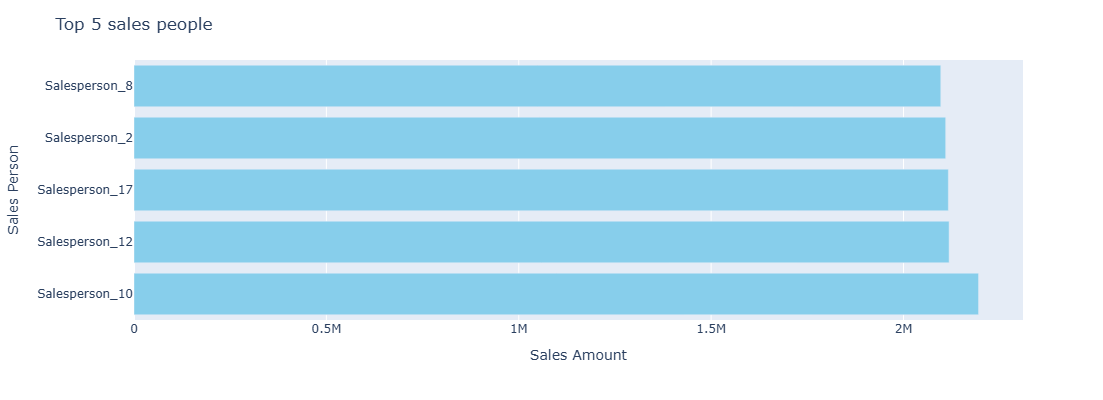

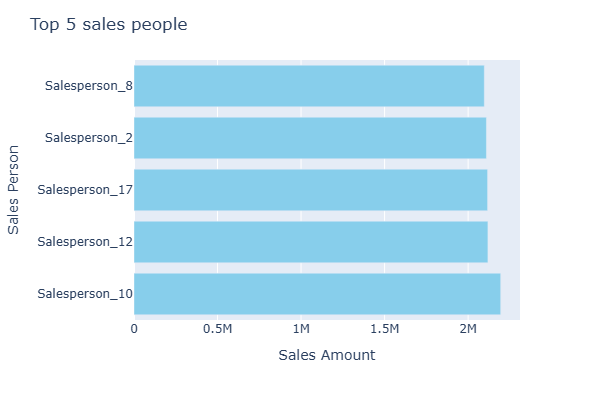

In [172]:
fig=px.bar(
    top_salespeople,
    y=top_salespeople.index,
    x=top_salespeople.values,
    color_discrete_sequence=["skyblue"],
   
    
)
fig.update_layout(
    width=600,
    height=400,
    title="Top 5 sales people",
    xaxis_title="Sales Amount"
    
)
fig.show()
print()
fig.write_image("Top 5 sales people.png",height=400,width=600)
Image("Top 5 sales people.png")

In [173]:

region_person=df.groupby(["Region","Sales Person"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index().head(5)
print(region_person)
print()

country_person=df.groupby(["Country","Sales Person"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index().head(5)
print(country_person.head(26))
print()



  Region    Sales Person  Sales_Amount
0   APAC  Salesperson_10     1177337.0
1   APAC  Salesperson_12     1080653.0
2   APAC   Salesperson_2     1073695.0
3   APAC  Salesperson_14     1055754.0
4   APAC   Salesperson_0     1043434.0

       Country    Sales Person  Sales_Amount
0  New Zealand  Salesperson_10      487123.0
1  New Zealand  Salesperson_24      410473.0
2    Australia  Salesperson_15      409395.0
3    Australia  Salesperson_19      404320.0
4        India   Salesperson_2      404201.0



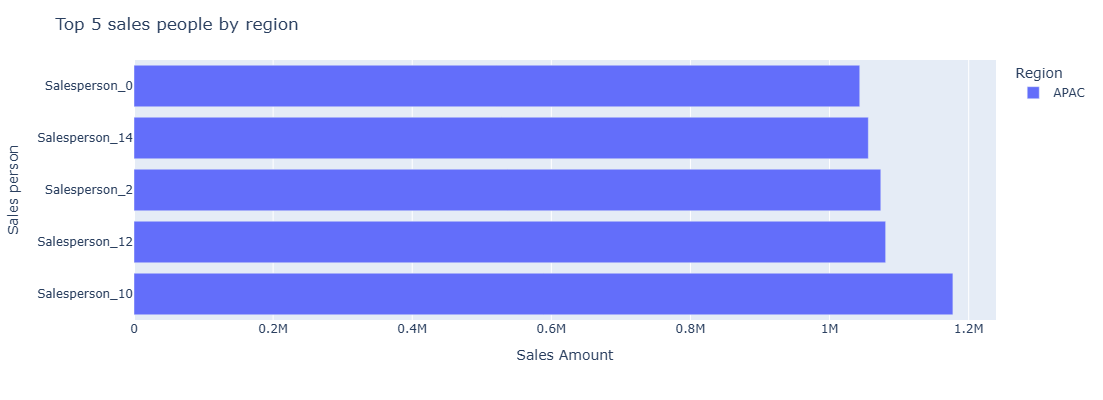

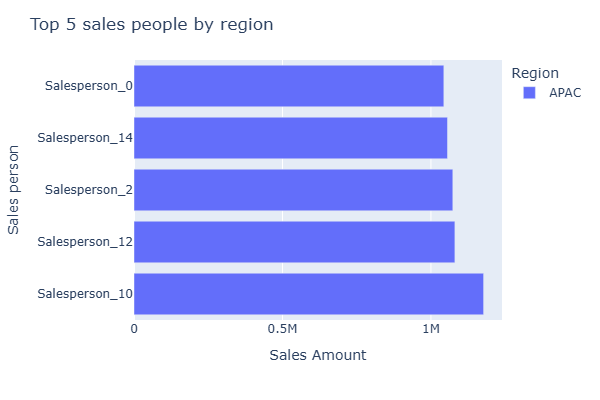

In [174]:
fig=px.bar(
    region_person,
    y="Sales Person",
    x="Sales_Amount",
    color="Region",
    orientation="h"
)
fig.update_layout(
    title="Top 5 sales people by region",
    height=400,
    width=600,
    xaxis_title="Sales Amount",
    yaxis_title="Sales person"
)
fig.show()
print()
fig.write_image("Top 5 sales people by region.png",height=400,width=600)
Image("Top 5 sales people by region.png")

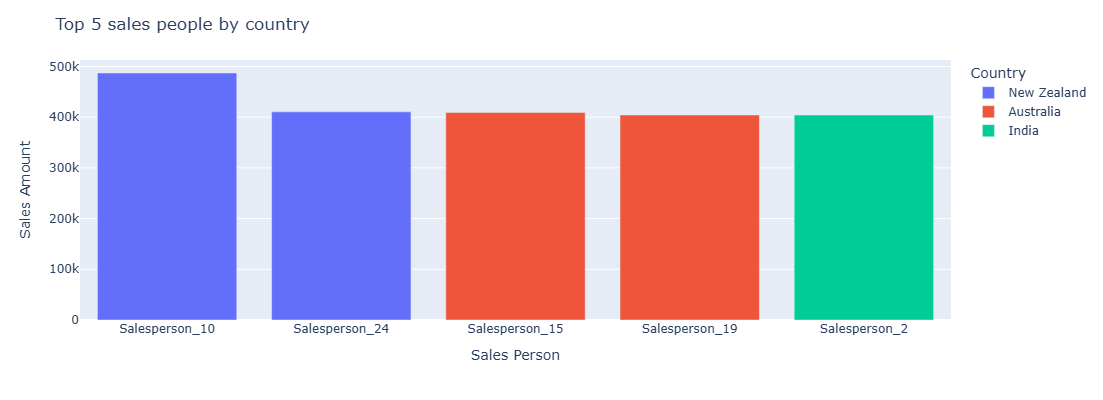

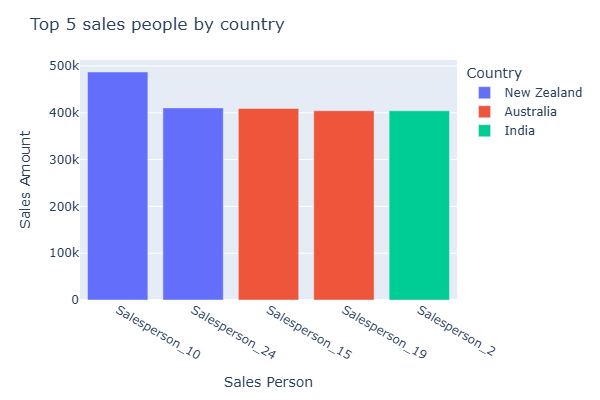

In [175]:

fig=px.bar(
    country_person,
    x="Sales Person",
    y="Sales_Amount",
    color="Country"
)
fig.update_layout(
    title="Top 5 sales people by country",
    height=400,
    width=600,
    xaxis_title="Sales Person",
    yaxis_title="Sales Amount"
    
)
fig.show()
print()
fig.write_image("Top 5 sales people by country.png",height=400,width=600)
Image("Top 5 sales people by country.png")

In [178]:
sales_person=df.groupby(["Team","Sales Person"])["Sales_Amount"].sum().reset_index().sort_values(by="Sales_Amount",ascending=False).head(5)
print(sales_person)
print()
"""
ranked_sales = df.sort_values(by='Sales_Amount', ascending=False)
top_columns = ranked_sales[['Team', 'Sales Person', 'Sales_Amount']]
print(top_columns)



print()

"""

      Team    Sales Person  Sales_Amount
20  Team_3  Salesperson_10     2195032.0
21  Team_3  Salesperson_12     2118543.0
8   Team_1  Salesperson_17     2116569.0
10  Team_1   Salesperson_2     2109618.0
13  Team_1   Salesperson_8     2096857.0



"\nranked_sales = df.sort_values(by='Sales_Amount', ascending=False)\ntop_columns = ranked_sales[['Team', 'Sales Person', 'Sales_Amount']]\nprint(top_columns)\n\n\n\nprint()\n\n"

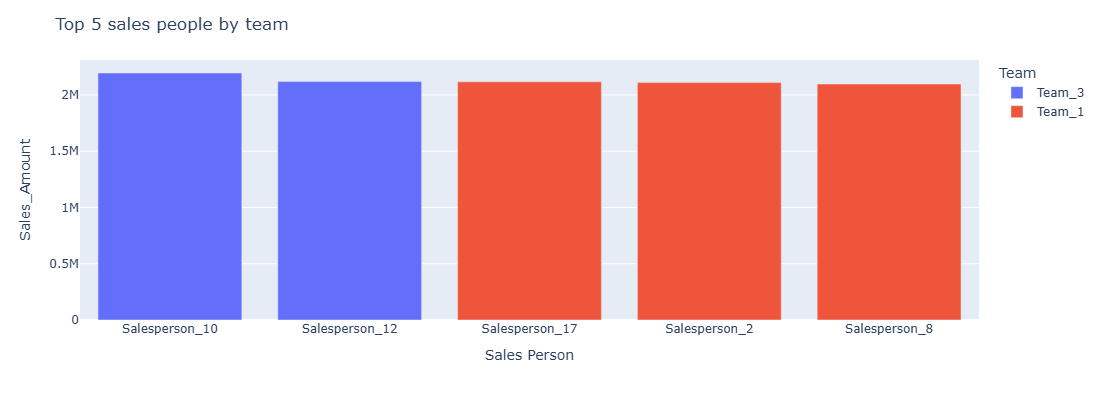

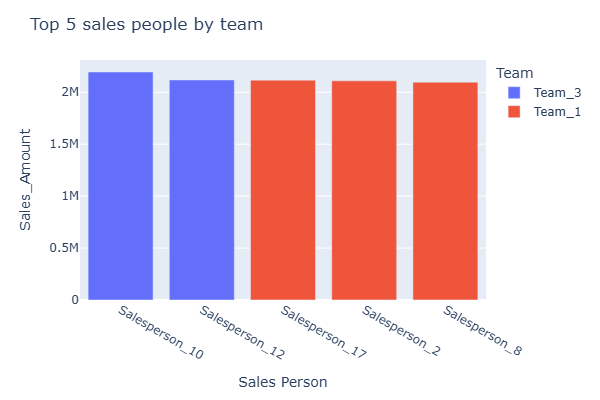

In [179]:
fig=px.bar(
    sales_person,
    x="Sales Person",
    y="Sales_Amount",
    color="Team",
   
)
fig.update_layout(
    width=600,
    height=400,
    title="Top 5 sales people by team"
)
fig.show()

print()
fig.write_image("Top 5 sales people by team.png",height=400,width=600)
Image("Top 5 sales people by team.png")

**SALES PER CATEGORY**



In each region bars are leading followed by bites then other.

In each country we have the same trend.

It now makes sense, bars category has many products (11 products) thus a higher sales, bites has 7 products while others has few products(4 products) thus a low sales. If it had much products then sales would rise.

In [73]:
category_num=df["Category"].nunique()
print("Total categories:",category_num)
print()

categories=df["Category"].unique()
print("Categories:",categories)
print()

categories_sales=df.groupby("Category")["Sales_Amount"].sum().reset_index()
print(categories_sales)
print()

Total categories: 3

Categories: ['Bars' 'Bites' 'Other']

  Category  Sales_Amount
0     Bars    23199771.0
1    Bites    14638925.0
2    Other     8248191.0



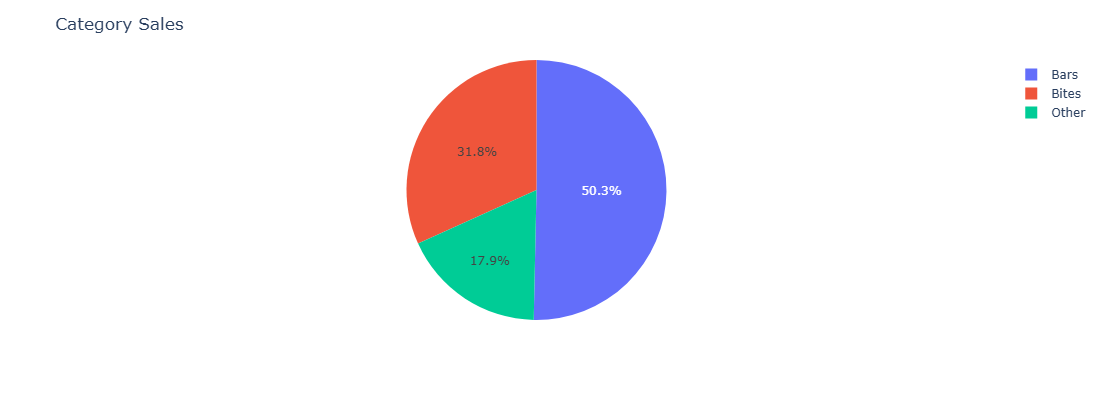

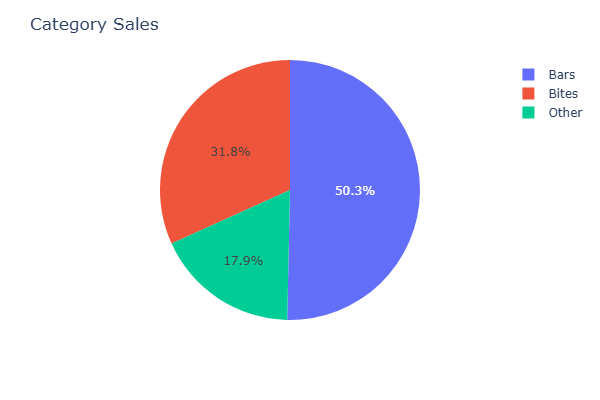

In [181]:
fig=px.pie(
    categories_sales,
    names="Category",
    values="Sales_Amount"    
)
fig.update_layout(
    width=600,
    height=400,
    title="Category Sales"
)
fig.show()
print()
fig.write_image("Category sales.png",height=400,width=600)
Image("Category sales.png")

- Bars are leading with 23,199,771 (50.3%) followed by Bites with  14,638,925 (31.8%) then other with 8,248,191 (17.9%)

In [76]:
category_product=df.groupby(["Category","Product Type"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index().head(5)
category_product

,Category,Product Type,Sales_Amount
0,Bars,Smooth Sliky Salty,2315012.0
1,Bites,Peanut Butter Cubes,2265410.0
2,Bites,After Nines,2174172.0
3,Bites,Spicy Special Slims,2168138.0
4,Bars,Orange Choco,2162601.0


In [77]:
region_categories_sales=df.groupby(["Region","Category"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index().head(5)
print(region_categories_sales)
print()

country_categories_sales=df.groupby(["Country","Category"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index().head(5)
print(country_categories_sales)
print()



     Region Category  Sales_Amount
0      APAC     Bars    11586722.0
1  Americas     Bars     7807926.0
2      APAC    Bites     7431312.0
3  Americas    Bites     4865595.0
4      APAC    Other     4200728.0

     Country Category  Sales_Amount
0  Australia     Bars     4062807.0
1     Canada     Bars     3909493.0
2        USA     Bars     3898433.0
3         UK     Bars     3805123.0
4      India     Bars     3771656.0



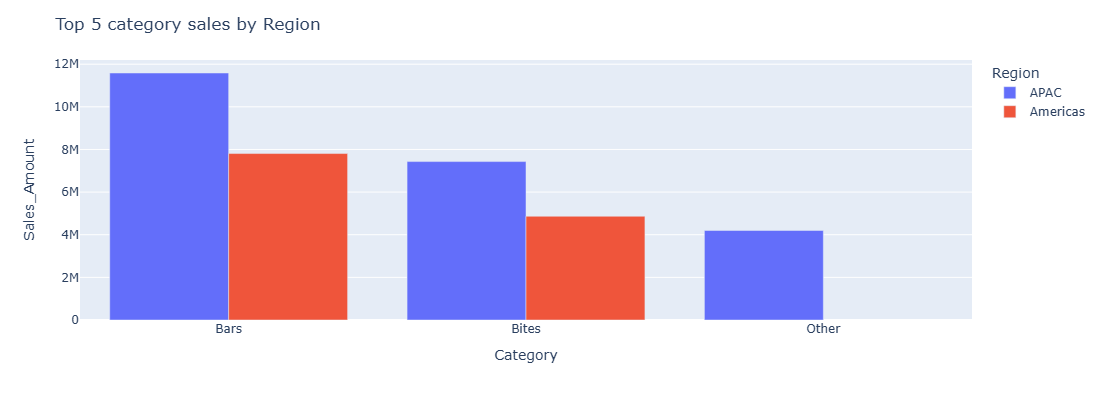

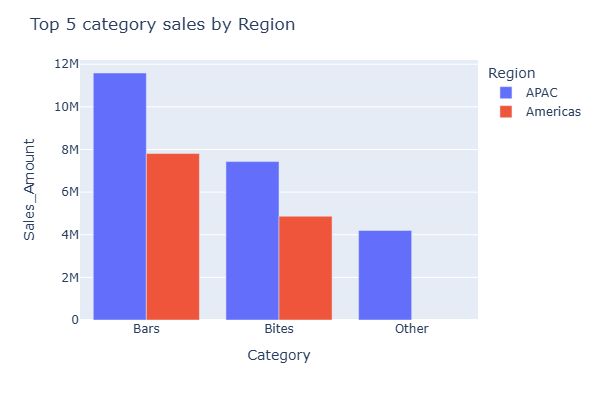

In [189]:
fig=px.bar(
    region_categories_sales,
    x="Category",
    y="Sales_Amount",
    color="Region",
    barmode="group",
    #text_auto=True
    
)
fig.update_layout(
    title="Top 5 category sales by Region",
    width=600,
    height=400,
    
    
)
fig.show()
print()
fig.write_image("Category sales by region.png",height=400,width=600)
Image("Category sales by region.png")

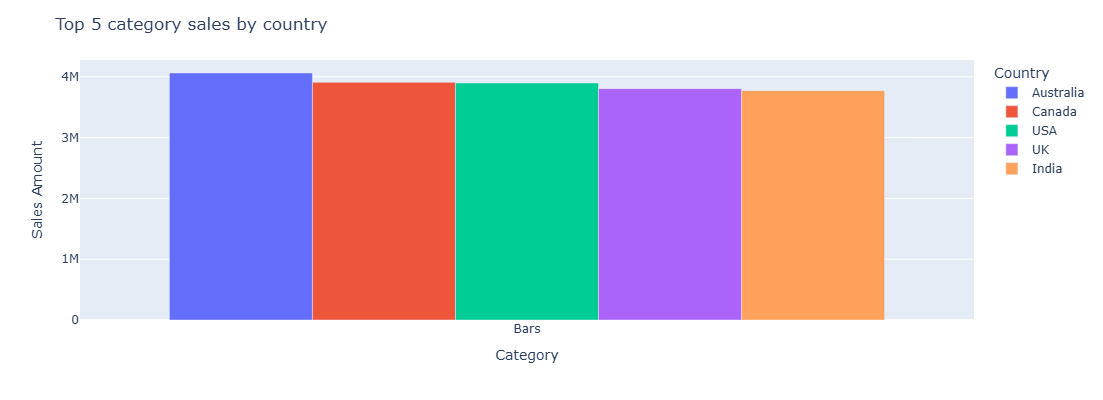

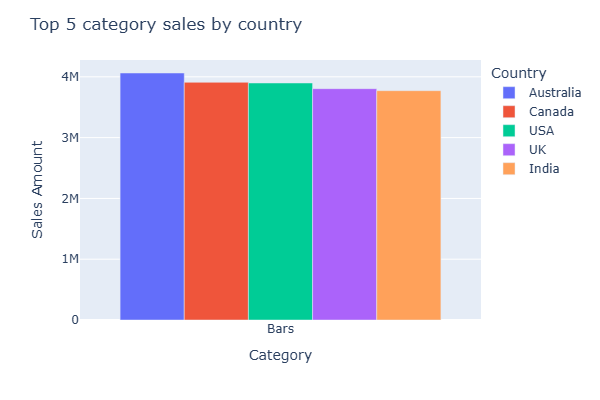

In [79]:
fig=px.bar(
    country_categories_sales,
    x="Category",
    y="Sales_Amount",
    color="Country",
    barmode="group"
    
)
fig.update_layout(
    title="Top 5 category sales by country",
    width=600,
    height=400,  
    yaxis_title="Sales Amount"
)
fig.show()
print()
fig.write_image("Category sales by country.png",height=400,width=600)
Image("Category sales by country.png")

**SALES PER PRODUCT TYPE**

In [81]:
total_types=df["Product Type"].nunique()
print("Total product types:",total_types)
print()

product_types=df["Product Type"].unique()
print("Product types:",product_types)
print()

product_sales=df.groupby(["Product Type"])["Sales_Amount"].sum().sort_values(ascending=False).head(5)
print(product_sales)

Total product types: 22

Product types: ['Almond Choco' 'Caramel Stuffed Bars' 'Eclairs' 'Manuka Honey Choco'
 'After Nines' 'Spicy Special Slims' '85% Dark Bars' 'White Choc'
 'Smooth Sliky Salty' 'Orange Choco' 'Mint Chip Choco'
 'Peanut Butter Cubes' '70% Dark Bites' 'Drinking Coco' 'Fruit & Nut Bars'
 'Raspberry Choco' 'Organic Choco Syrup' '99% Dark & Pure' 'Milk Bars'
 '50% Dark Bites' "Baker's Choco Chips" 'Choco Coated Almonds']

Product Type
Smooth Sliky Salty     2315012.0
Peanut Butter Cubes    2265410.0
After Nines            2174172.0
Spicy Special Slims    2168138.0
Orange Choco           2162601.0
Name: Sales_Amount, dtype: float64


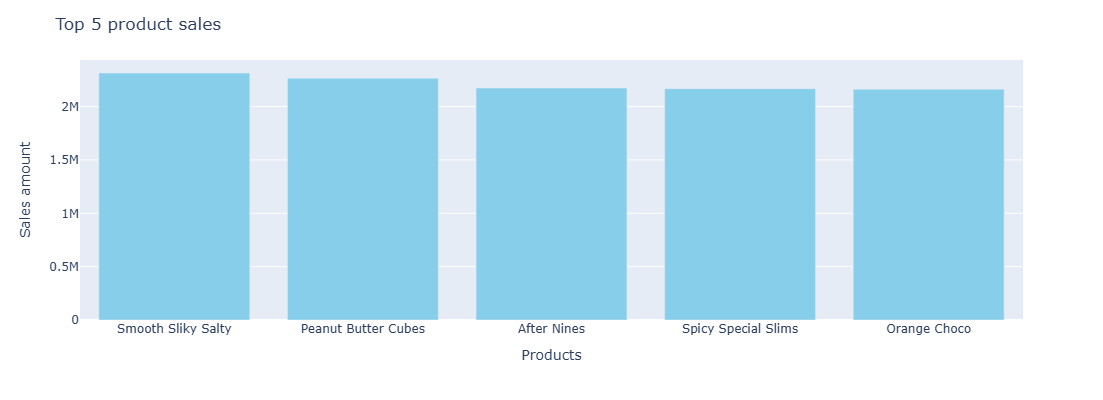

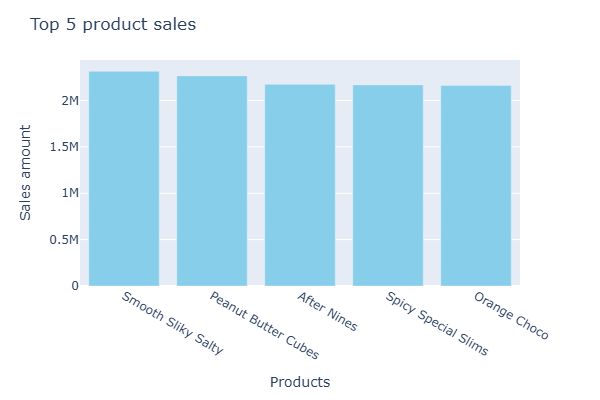

In [82]:
fig=px.bar(   
    x=product_sales.index,
    y=product_sales.values,
    color_discrete_sequence=["skyblue"],  
)
fig.update_layout(
    title="Top 5 product sales",
    width=600,
    height=400,
    xaxis_title="Products",
    yaxis_title="Sales amount"   
)
fig.show()
print()
fig.write_image("Top 5 product sales.png",height=400,width=600)
Image("Top 5 product sales.png")

In [201]:
product_category_sales=df.groupby(["Product Type","Category"])["Sales_Amount"].sum().sort_values(ascending=False).head(5).reset_index()
print(product_category_sales)

          Product Type Category  Sales_Amount
0   Smooth Sliky Salty     Bars     2315012.0
1  Peanut Butter Cubes    Bites     2265410.0
2          After Nines    Bites     2174172.0
3  Spicy Special Slims    Bites     2168138.0
4         Orange Choco     Bars     2162601.0


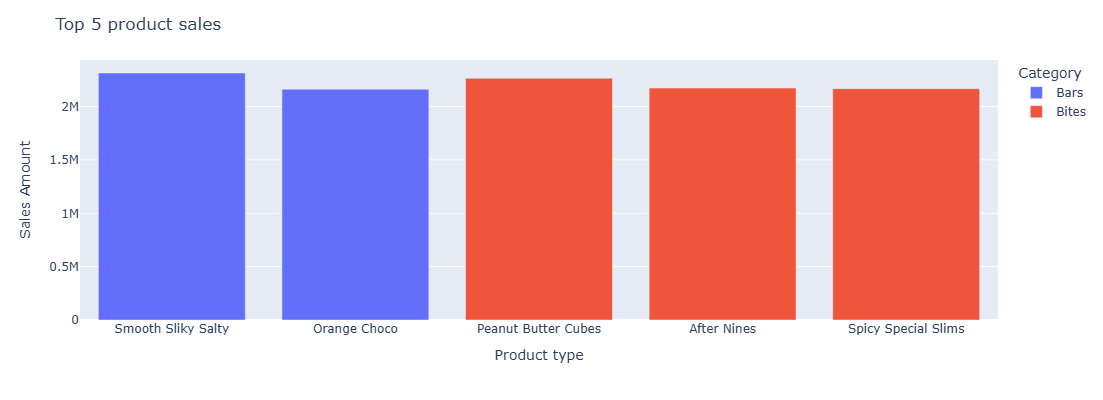

'\nprint()\nfig.write_image("Top 5 product sales.png",height=400,width=600)\nImage("Top 5 product sales.png")\n'

In [209]:
fig=px.bar(
    product_category_sales,
    x="Product Type",
    y="Sales_Amount",
    color="Category"
)
fig.update_layout(
    width=600,
    height=400,
    title="Top 5 product sales",
    xaxis_title="Product type",
    yaxis_title="Sales Amount"
)
fig.show()
"""
print()
fig.write_image("Top 5 product sales.png",height=400,width=600)
Image("Top 5 product sales.png")
"""